In [1]:
%matplotlib inline
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the rent data belonging to 2014
rent_14 = pd.read_csv("C://Users//nature//Desktop//datascience_miniprojects//census_rent//rent_latlong.csv")
rent_14 = rent_14.rename(columns={"geo_id2":"geo_id14", 
                                  "msa_name":"geo_name",
                                  "median_contract_rent":"median_rent_14"})
rent_14 = rent_14[['geo_id14', 'geo_name', 'city_state', 'median_rent_14', 'latitude', 'longitude']]
rent_14.head()

,geo_id14,geo_name,city_state,median_rent_14,latitude,longitude
0,10140,"Aberdeen, WA Micro Area","Aberdeen, WA",626,46.975371,-123.815722
1,10180,"Abilene, TX Metro Area","Abilene, TX",613,32.448736,-99.733144
2,10300,"Adrian, MI Micro Area","Adrian, MI",556,41.897547,-84.037166
3,10420,"Akron, OH Metro Area","Akron, OH",627,41.081445,-81.519005
4,10460,"Alamogordo, NM Micro Area","Alamogordo, NM",700,32.899532,-105.960265


In [3]:
# Load the 2010 rent data 
rent_10 = pd.read_csv("C://Users//nature//Desktop//datascience_miniprojects//census_rent//ACS_10_1YR_B25058.csv")
rent_10 = rent_10.rename(columns={"GEO.id":"geo_id",
                                  "GEO.id2":"geo_id10",
                                  "GEO.display-label":"geo_name",
                                  "HD01_VD01":"median_rent_10",
                                  "HD02_VD01":"margin_error"})
rent_10 = rent_10[["geo_id10", "median_rent_10"]]
rent_10.head()

,geo_id10,median_rent_10
0,10140,562
1,10180,554
2,10300,537
3,10420,579
4,10500,477


# Combine the rent data of 2014 and 2010

There are some changes that we can see in the datasets of 2014 and 2010 in terms of area names and codes. With the help of dictionary, map the changes that's visible from 2014 to 2010 codes.

In [4]:
codes_14_10 = {
    14010:14060, #bloomington il
    15680:30500, #lexington park md
    16060:32060, #marion il
    17200:30100, #lebanon nh
    25840:37820, #pendleton
    26090:26100, #holland
    29200:29140, #lafayette
    38240:43860, #pinehurst
    41400:20620, #salem oh
    48260:44600, #weirton
    49220:32270, #wisconsin rapids
    31080:31100, #los angeles
    42200:42060, #santa barbara
    46520:26180, #honolulu
    48260:44600} #steubenville

rent_14["geo_id10"] = rent_14["geo_id14"].map(lambda x: codes_14_10[x] if x in codes_14_10.keys() else x)

In [5]:
rent = pd.merge(rent_14, rent_10, on="geo_id10")
rent.head()

,geo_id14,geo_name,city_state,median_rent_14,latitude,longitude,geo_id10,median_rent_10
0,10140,"Aberdeen, WA Micro Area","Aberdeen, WA",626,46.975371,-123.815722,10140,562
1,10180,"Abilene, TX Metro Area","Abilene, TX",613,32.448736,-99.733144,10180,554
2,10300,"Adrian, MI Micro Area","Adrian, MI",556,41.897547,-84.037166,10300,537
3,10420,"Akron, OH Metro Area","Akron, OH",627,41.081445,-81.519005,10420,579
4,10500,"Albany, GA Metro Area","Albany, GA",480,31.578507,-84.155741,10500,477


In [6]:
# Calculate the percentage of median rent that's changed between 2010 and 2014
rent['rent_change_pct'] = (rent['median_rent_14'] / rent['median_rent_10']-1) * 100
rent.sort_values(by='rent_change_pct')[['geo_name', 'rent_change_pct']].head()

,geo_name,rent_change_pct
414,"Seneca, SC Micro Area",-14.417745
413,"Sebring, FL Metro Area",-11.992945
69,"Carson City, NV Metro Area",-9.015257
464,"Valdosta, GA Metro Area",-7.992895
442,"Talladega-Sylacauga, AL Micro Area",-7.049608


# Load the population data

The dataset contains population values of 2010 from the census and also estimates of 2014 population

In [7]:
# Load the population data
population = pd.read_csv('C://Users//nature//Desktop//datascience_miniprojects//census_rent//PEP_2014_PEPANNRES.csv', encoding='utf-8')
population = population.rename(columns={'GEO.id2':'geo_id14', 
                              'rescen42010':'pop_10', 
                              'respop72014':'pop_14_est'})
population = population[['geo_id14', 'pop_10', 'pop_14_est']]
population.head()

,geo_id14,pop_10,pop_14_est
0,10100,40602,42391
1,10140,72797,70818
2,10180,165252,168592
3,10220,37492,38005
4,10300,99892,99047


In [8]:
# Now it's time to combine the rent data with population data 
df = pd.merge(rent, population, on="geo_id14")
df.head()

,geo_id14,geo_name,city_state,median_rent_14,latitude,longitude,geo_id10,median_rent_10,rent_change_pct,pop_10,pop_14_est
0,10140,"Aberdeen, WA Micro Area","Aberdeen, WA",626,46.975371,-123.815722,10140,562,11.387900,72797,70818
1,10180,"Abilene, TX Metro Area","Abilene, TX",613,32.448736,-99.733144,10180,554,10.649819,165252,168592
2,10300,"Adrian, MI Micro Area","Adrian, MI",556,41.897547,-84.037166,10300,537,3.538175,99892,99047
3,10420,"Akron, OH Metro Area","Akron, OH",627,41.081445,-81.519005,10420,579,8.290155,703200,703825
4,10500,"Albany, GA Metro Area","Albany, GA",480,31.578507,-84.155741,10500,477,0.628931,157308,154925


In [9]:
# Calculate the percentage of population that's changed between 2010 and 2014
df['popl_change_pct'] = (df['pop_14_est'] / df['pop_10'] - 1) * 100
df.sort_values(by='popl_change_pct')[['geo_name', 'popl_change_pct']].head()

,geo_name,popl_change_pct
348,"Pine Bluff, AR Metro Area",-5.527738
142,"Farmington, NM Metro Area",-4.812986
377,"Roanoke Rapids, NC Micro Area",-4.371663
214,"Johnstown, PA Metro Area",-4.139088
277,"Martinsville, VA Micro Area",-3.207203


# Time to plot data with scatter plots


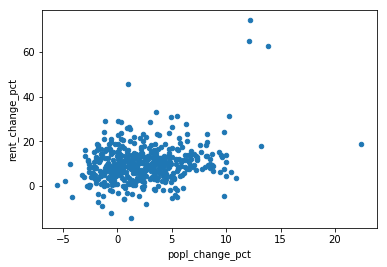

In [10]:
# plotting for percent changes in rent and population 
df.plot(kind="scatter", x="popl_change_pct", y="rent_change_pct")

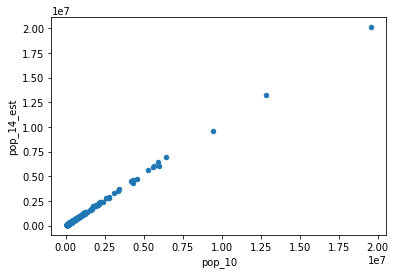

In [11]:
# Compare 2014 population to 2010 population
df.plot(kind="scatter", x="pop_10", y="pop_14_est")

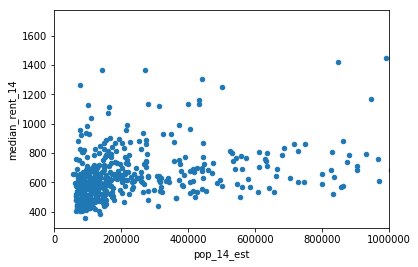

In [12]:
# Comparison between 2014 median rent and 2014 population
df.plot(kind="scatter", x="pop_14_est", y="median_rent_14", xlim=[0, 1000000])

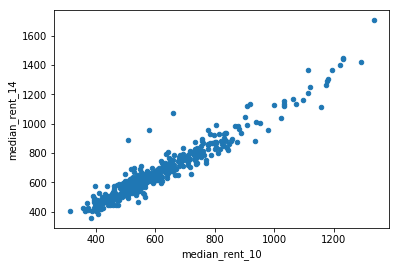

In [13]:
# Compare 2014's and 2010's median rents
df.plot(kind='scatter', x='median_rent_10', y='median_rent_14')

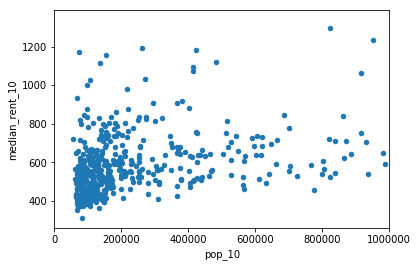

In [14]:
# Compare median rent of 2010 to 2010 population
df.plot(kind='scatter', x='pop_10', y='median_rent_10', xlim=[0, 1000000])

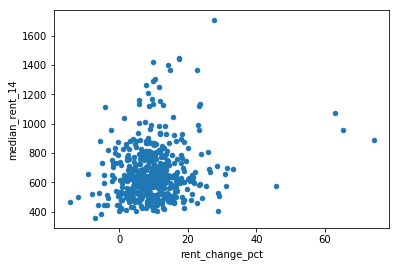

In [15]:
# Compare 2014 median rent to percent change in 2010-2014 rents
df.plot(kind='scatter', x='rent_change_pct', y='median_rent_14')